# Problem 1:

Consider the linear programming problem: Find $y_1$ and $y_2$ to minimize $y_1+y_2$ subject to the constraints 

$$\begin{align*}
y_1+2y_2 &\geq 3\\
2y_1+y_2 & \geq 5\\
y_2 & \geq 0.
\end{align*}$$

Graph the constraint set and solve.

------

First, we'll do it graphically. Then we'll try with PuLP.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(0, 4)

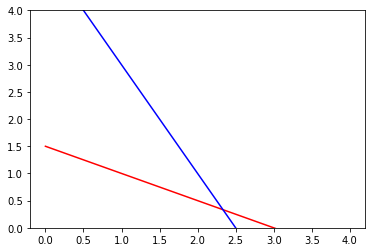

In [21]:
y1 = np.linspace(0,4,100)
plt.plot(y1, (3-y1)/2, 'r', y1, 5-2*y1, 'b')
plt.ylim(0,4)

Since the objective function has slope $-1$, it falls out of the contraint set (the region on the right of the graph) when the lines intersect. This means that

$$\frac{3-y_1}{2} = 5-2*y_1 \implies y_1 = \frac{7}{3} \implies y_2 = \frac{1}{3}.$$

We verify with PuLP

In [20]:
from pulp import *
problem = LpProblem("Ferguson_Problem_1", LpMinimize)

y1 = LpVariable("y1", None)
y2 = LpVariable("y2", 0)

problem += y1+y2
problem += y1+2*y2 >= 3
problem += 2*y1+y2 >= 5

problem.writeLP("problem1.lp")

problem.solve()


1

In [17]:
print("Status:", LpStatus[problem.status])

Status: Optimal


In [18]:
for v in problem.variables():
    print(v.name, '=', v.varValue)

y1 = 2.3333333
y2 = 0.33333333


# Problem 2

Find $x_1$ and $x_2$ to maximize $ax_1+x_2$ subject to the constraints in the numerical example of Figure 1. Find the value as a function of $a$.

-----

We now want to maximize $ax_1+x_2$ subject to the constraints
$$\begin{align*}
x_1 & \geq 0\\
x_2 & \geq 0\\
x_1+2x_2 &\leq 4\\
4x_1+2x_2 &\leq 12\\
-x_1+x_2 &\leq 1.
\end{align*}$$

as a function of $a$.

Graphing gives:

(-1, 8)

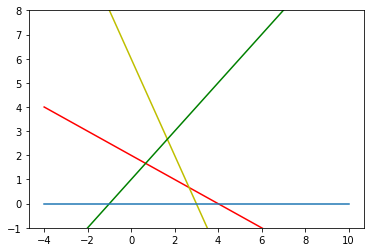

In [29]:
x1=np.linspace(-4,10,100)

plt.plot(x1, (4-x1)/2, 'r', x1, (12-4*x1)/2, 'y', x1, 1+x1, 'g', x1, x1*0)
plt.ylim(-1,8)

Now, the slope the function $ax_1+x_2=c$ is $-a.$

 * If the slope is *as steep or steeper* (i.e., equally or more negative) than that of the yellow line, then the line furthest from the origin is that which intersects at the **yellow** and **blue** lines at the point (3,0).

 * If it has a (negative) steepness between that of the red and yellow lines, the intersection occurs at the **red** and **yellow** lines at the point (8/3,2/3).
 * If it has slope between the red and green lines, it intersects at the **red** and **green** lines at the point (2/3,5/3).
 * If it has slope great than the green line, it 

 * If it has a positive slope greater than the  green line, then it occurs at green line and the $y$ axis at (1,0).
 
The slopes of the red, green, yellow, and blue lines are $m_r = -.5, m_g=1, m_y=-2, m_b=0.$

Hence, we will have

$$v(a) = \begin{cases}
3a &  -\infty < -a \leq -2\\
a*\frac{8}{3}+ \frac{2}{3} & -2 < -a \leq -.5\\
a\frac{4}{3} + \frac{7}{3}& -.5 < -a \leq 1\\
1 & 1 < -a < \infty\\
\end{cases}$$

